<a href="https://colab.research.google.com/github/ravin235/arima/blob/main/StageC_Quiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/ravin235/groupc-quiz/main/Data_for_UCI_named.csv')

In [ ]:
data.head()

In [3]:
df = data.copy()

In [ ]:
df.drop(columns='stab',inplace=True)
df.head()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
scaler = StandardScaler()
label_encoder = LabelEncoder()
X = df.drop(columns='stabf')
y = label_encoder.fit_transform(df['stabf'])
y

In [ ]:
X

In [6]:
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=1)

In [7]:
normalised_x_train = scaler.fit_transform(x_train)
normalised_x_test = scaler.fit_transform(x_test)

In [8]:
from sklearn.ensemble import (RandomForestClassifier,
                              ExtraTreesClassifier)
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [9]:
#classifiers
rfc = RandomForestClassifier(random_state=1)
xtc = ExtraTreesClassifier(random_state=1)
xgbc = XGBClassifier(random_state=1)
lgbmc = LGBMClassifier(random_state=1)


In [10]:
rfc.fit(normalised_x_train,y_train)
xtc.fit(normalised_x_train,y_train)
xgbc.fit(normalised_x_train, y_train)
lgbmc.fit(normalised_x_train, y_train)

LGBMClassifier(random_state=1)

# Confusion Matrix

In [12]:
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score,confusion_matrix

In [17]:
new_predictions = rfc.predict(normalised_x_test)
cnf_mat = confusion_matrix(y_true=y_test, y_pred=new_predictions, labels=[1, 0])
cnf_mat

array([[1232,   56],
       [  88,  624]])

# Q14 What is the accuracy on the test set using the random forest classifier? In 4 decimal places.

In [31]:
accuracy = accuracy_score(y_true=y_test, y_pred=new_predictions)
print('Accuracy: {}'.format(round(accuracy), 4))

Accuracy: 1


In [20]:
precision = precision_score(y_true=y_test, y_pred=new_predictions, pos_label=1)
print('Precision: {}'.format(round(precision*100), 2))

Precision: 93


In [21]:
recall = recall_score(y_true=y_test, y_pred=new_predictions, pos_label=0)
print('Recall: {}'.format(round(recall*100), 2))

Recall: 88


In [24]:
f1 = f1_score(y_true=y_test, y_pred=new_predictions, pos_label=1)
print('F1: {}'.format(round(f1*100), 2))

F1: 94


#Q15: What is the accuracy on the test set using the XGboost classifier? In 4 decimal places.

In [33]:
xgbc_pred = xgbc.predict(normalised_x_test)
xgbc_accuracy = accuracy_score(y_true=y_test, y_pred = xgbc_pred)
xgbc_accuracy


0.946

#Q16:  What is the accuracy on the test set using the LGBM classifier? In 4 decimal places.

In [34]:
lgbmc_pred = lgbmc.predict(normalised_x_test)
lgbmc_accuracy = accuracy_score(y_true=y_test, y_pred = lgbmc_pred)
lgbmc_accuracy

0.9355

# Q17: Using the ExtraTreesClassifier as your estimator with cv=5, n_iter=10, scoring = 'accuracy', n_jobs = -1, verbose = 1 and random_state = 1. What are the best hyperparameters from the randomized search CV?

In [50]:
from sklearn.model_selection import RandomizedSearchCV

In [51]:
xt_clf = ExtraTreesClassifier()
parameters = {
    'n_estimators': [100, 500, 300, 1000],
    'min_samples_split': [2,5,2,7],
    'min_samples_leaf': [4,8,6,8],
    'max_features': [None, 'log2','auto',None]
}
clf = RandomizedSearchCV(xt_clf, parameters, cv=5, n_iter=10,scoring='accuracy', n_jobs=-1, verbose=1,random_state=1)
clf.fit(normalised_x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=ExtraTreesClassifier(), n_jobs=-1,
                   param_distributions={'max_features': [None, 'log2', 'auto',
                                                         None],
                                        'min_samples_leaf': [4, 8, 6, 8],
                                        'min_samples_split': [2, 5, 2, 7],
                                        'n_estimators': [100, 500, 300, 1000]},
                   random_state=1, scoring='accuracy', verbose=1)

In [52]:
clf.best_estimator_

ExtraTreesClassifier(max_features=None, min_samples_leaf=6, n_estimators=500)

# Q20: Find the feature importance using the optimal ExtraTreesClassifier model. Which features are the most and least important respectively?

[0.11870096 0.11866964 0.11529766 0.11768899 0.03819717 0.03922227
 0.03985691 0.03955692 0.0894596  0.09326755 0.09783918 0.09224315]


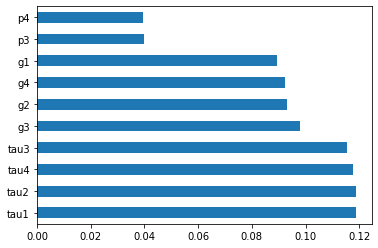

In [47]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()